# Загрузка и предобработка данных

Подключим все необходимые библиотеки.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим исходные данные.

In [2]:
data = pd.read_csv("../data/train_data.csv", encoding="utf-8", index_col='index')

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404.,Добрый день!_x000D_\nПодскажите пожалуйста что...,Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки // D251110041,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира)// C2231...,На устройстве не работает WiFi\n,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Удалим повторяющиеся строки, если они есть.

In [3]:
data = data.drop_duplicates()

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404.,Добрый день!_x000D_\nПодскажите пожалуйста что...,Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки // D251110041,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира)// C2231...,На устройстве не работает WiFi\n,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Заметим, что в письмах часто встречается символ "_x000D_", он не несет никакой информации, поэтому удалим его.

In [204]:
data['Описание'] = data['Описание'].str.replace('_x000D_', '', regex=False)

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404.,"Добрый день!\nПодскажите пожалуйста что может,...",Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки // D251110041,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира)// C2231...,На устройстве не работает WiFi\n,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Сейчас в датасете серийные номера записаны в некоторых случаях через запятую, в некоторых случаях через произвольное число пробелов.

С помощью регулярных выражений выделим серийные номера в столбце "Серийный номер" и унифицируем их запись (запишем их через ', ').

In [ ]:
patterns = [
    r'\b[A-Z]\d{9}\b',
    r'\b[A-Z]{3}\d{11}\b',
    r'\b[A-Z]\d{9}\([A-Z0-9]+\)\b' 
]

def clean_serial_numbers(serial_numbers):
    matches = []
    for pattern in patterns:
        matches.extend(re.findall(pattern, serial_numbers))

    if not matches:
        return serial_numbers
    return ', '.join(matches)

data['Серийный номер'] = data['Серийный номер'].apply(clean_serial_numbers)

In [206]:
data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404.,"Добрый день!\nПодскажите пожалуйста что может,...",Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки // D251110041,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира)// C2231...,На устройстве не работает WiFi\n,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Удалим серийный номер из названия темы, чтобы обнаружить строки, у которых совпадает вся информация, кроме серийного номера.

In [207]:
combined_pattern = '|'.join(patterns)

data['Тема'] = data['Тема'].str.replace(combined_pattern, '', regex=True)
data['Тема'] = data['Тема'].str.strip()
data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404.,"Добрый день!\nПодскажите пожалуйста что может,...",Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки //,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира)//,На устройстве не работает WiFi\n,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Так как некоторые значения в колонках отличаются только наличием какого-либо символа на конце, удалим лишние символы в конце. 

In [208]:
prep_pattern = r'[\/\.\,\!\?\;\:\-\_\(]+$'

data['Тема'] = data['Тема'].str.replace(prep_pattern, '', regex=True).str.strip()
data['Описание'] = data['Описание'].str.replace(prep_pattern, '', regex=True).str.strip()
data['Тип оборудования'] = data['Тип оборудования'].str.replace(prep_pattern, '', regex=True).str.strip()
data['Точка отказа'] = data['Точка отказа'].str.replace(prep_pattern, '', regex=True).str.strip()

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404,"Добрый день!\nПодскажите пожалуйста что может,...",Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира),На устройстве не работает WiFi,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Удалим все переносы строки в конце описания.

In [209]:
slash_pattern = r'\n+$'

data['Описание'] = data['Описание'].str.replace(slash_pattern, '', regex=True)

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
0,Не работает блок питания,В течении недели перестал внезапно работать бл...,Ноутбук,Блок питания,C223100360
1,Не включается SILA LLC HK2-3404,"Добрый день!\nПодскажите пожалуйста что может,...",Ноутбук,Материнская плата,C223094534
2,Сервер СР2-5422 // Системные ошибки,Добрый вечер! На сервере появились системные о...,Сервер,Материнская плата,D251110041
3,Повреждение матрицы,Прошу произвести диагностику и сориентировать ...,Ноутбук,Матрица,C223014328
4,sila HK2-1404 c223014125 asset 7101087,Добрый день!\nПрошу взять ноутбук sila HK2-140...,Ноутбук,Материнская плата,C223014125
...,...,...,...,...,...
189,НК2-1404 // Не работает Wi-FI (Кашира),На устройстве не работает WiFi,Ноутбук,Wi-fi модуль,C223101219
190,Не работает блок питания (зарядка),Не работает блок питания (зарядка),Ноутбук,Блок питания,С223093223
191,Ноутбук НК2-1404 //Не работает клавиша F1 или ...,"Добрый день,\nпосле ремонта ноутбука перестала...",Ноутбук,Клавиатура,С223010731


Теперь посмотрим на данные, у которых есть дупликаты в столбце с описанием.

In [210]:
duplicates = data[data.duplicated(subset='Описание', keep=False)]

duplicates

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
index,,,,,
6,НК2-3404 // Мерцание экрана,У нас же третий из 50 ноутбуков СИЛА проявляет...,Ноутбук,Матрица,C223091001
20,HK2-1404 // Не работает зарядное устройство,Перестало работать зарядное устройство. С друг...,Ноутбук,Блок питания,C223102298
21,НК2-3404 // Мерцание экрана,У нас же третий из 50 ноутбуков СИЛА проявляет...,Ноутбук,Матрица,C223091126
35,СИЛА НК2-1404//Драйверы звука и видео пропадаю...,Будьте добры сообщить адрес сервисного центра ...,Ноутбук,Диск,C222090246
43,СИЛА HK2-1404 // Не работает зарядное устройство,Не работает зарядное устройство,Ноутбук,Блок питания,C223011088
47,"СИЛА НК2-1404 // Рябь, мерцание","Коллеги, добрый день!\nУ нас поломка 3-х ноутб...",Ноутбук,Матрица,C223014954
54,10552. СИЛА HK-1404 // замена блоков питания //,"Добрый день! Не работают блоки питания, прошу ...",Ноутбук,Блок питания,"C223010423, C223011174"
56,СИЛА HK2-1404 // Неисправность зарядного устро...,Добрый день!\nВ процессе эксплуатации у пользо...,Ноутбук,Блок питания,C223011355
60,HK2-1404 // Не работает зарядное устройство,Не работает зарядное устройство,Ноутбук,Блок питания,C223011313


Среди них есть такие, которые отличаются только серийным номером. Можно их сгрупировать, а в столбце "Серийный номер" указать все серийные номера, которые подходят к данной теме, описанию, типу оборудования и точке отказа.

In [211]:
data = data.groupby(['Тема', 'Описание', 'Тип оборудования', 'Точка отказа'], as_index=False).agg({
    'Серийный номер': ', '.join
})

data

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
0,+BB0EPgRDBEIEMQRDBDo- +BCEEGAQbBBA- +BB0EGg-2-...,Здравствуйте.\n\n Сломался блок...,Ноутбук,Блок питания,C222090381
1,/ шумит кулер / отклеились ножки,"Коллеги, добрый день.\n\nПрошу осуществить заб...",Ноутбук,Вентилятор,C223010310
2,10552. СИЛА HK-1404 // замена блоков питания //,"Добрый день! Не работают блоки питания, прошу ...",Ноутбук,Блок питания,"C223010423, C223011174"
3,10979. Ноутбук СИЛА НК2-1404 // не включается,Добрый день! Ноутбук не включается,Ноутбук,Материнская плата,C223012335
4,BIOS'ы,"Здравствуйте!\nПоделитесь, пожалуйста, последн...",Ноутбук,Консультация,C223010345
...,...,...,...,...,...
180,по неисправной плашке памяти на dd203 - Enclos...,Добрый день!\nПросьба открыть заявку по неиспр...,СХД,Оперативная память,CKM00193800300
181,полосы на матрице НК2-3404,Полосы на матрице.,Ноутбук,Матрица,C223090893
182,полосы на экране и отклеились ножки,Переодически (было 3-4 раза) появляются полосы...,Ноутбук,Матрица,c223012503
183,ремонт ноутбука СИЛА НК2-1404,не работает порт usd и порт type-c на ноутбуке...,Ноутбук,Материнская плата,C223100081


Сохраним получившийся датасет.

In [219]:
data.to_csv('../data/clear_data.csv', index=False)

Просмотрим информацию по датасету.

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Тема              185 non-null    object
 1   Описание          185 non-null    object
 2   Тип оборудования  185 non-null    object
 3   Точка отказа      185 non-null    object
 4   Серийный номер    185 non-null    object
dtypes: object(5)
memory usage: 7.4+ KB


Проверим на наличие пропусков.

In [214]:
data.isnull().sum()

Тема                0
Описание            0
Тип оборудования    0
Точка отказа        0
Серийный номер      0
dtype: int64

Пропусков нет, просмотрим базовую статистику по датасету.

In [215]:
data.describe()

,Тема,Описание,Тип оборудования,Точка отказа,Серийный номер
count,185,185,185,185,185
unique,177,175,3,18,181
top,Не работает блок питания,Будьте добры сообщить адрес сервисного центра ...,Ноутбук,Материнская плата,CKM01212505744
freq,3,4,146,42,2


Посмотрим распределение данных по каждому целевому признаку.

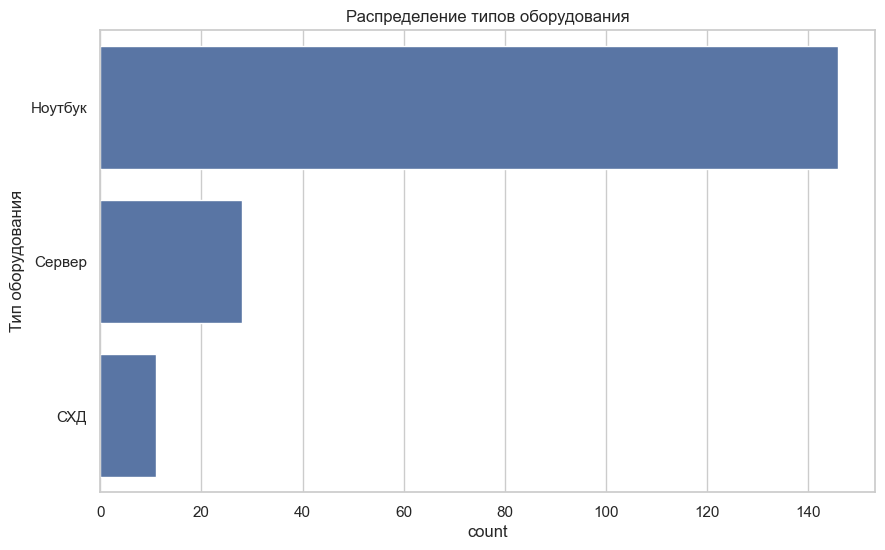

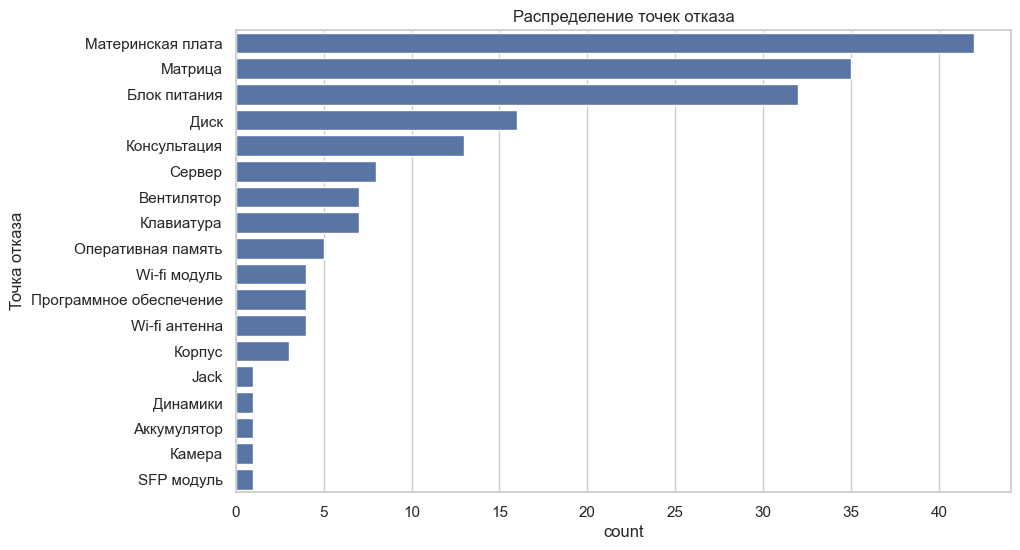

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(y='Тип оборудования', data=data, order=data['Тип оборудования'].value_counts().index)
plt.title('Распределение типов оборудования')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Точка отказа', data=data, order=data['Точка отказа'].value_counts().index)
plt.title('Распределение точек отказа')
plt.show()